In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(sklearn.__version__)

1.5.1


# 회귀분석 직접 실행

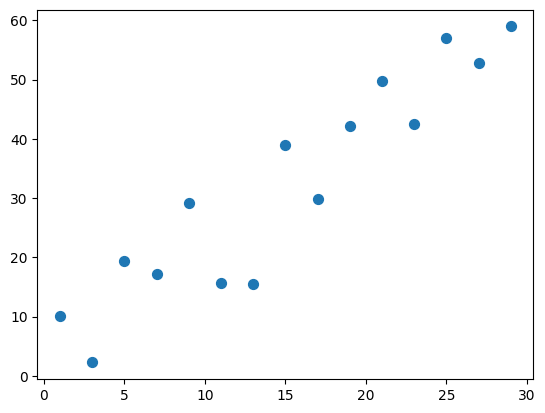

In [5]:
# 회귀분석
np.random.seed(910)

x = np.arange(1, 30, 2)
y = 2*x + 1 # coeff = 2, intercept = 1
y_random = y + np.random.normal(0, 8, len(y))
# plt.scatter(x, y, s = 50, label = "y")
plt.scatter(x, y_random, s = 50, label = "y_random")
plt.show()

In [6]:
x_mean = np.mean(x)
y_mean = np.mean(y_random)

Sxy = sum((x - x_mean)*(y_random - y_mean))
Sxx = sum((x - x_mean)**2)

b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean

print("b1 = ", b1.round(3))
print("b0 = ", b0.round(3))

b1 =  1.901
b0 =  3.566


y_random =  [10.1  2.3 19.4 17.1 29.2 15.6 15.5 38.9 29.9 42.2 49.7 42.4 57.  52.9
 59. ]
yhat =  [ 22.7   7.9  40.4  36.1  59.1  33.2  33.1  77.6  60.4  83.7  98.1  84.2
 111.9 104.  115.7]


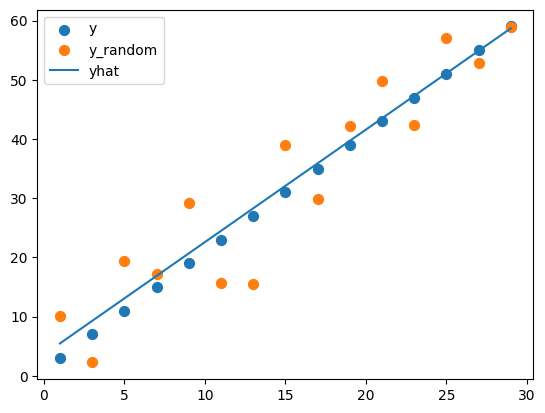

In [7]:
print("y_random = ", y_random.round(1))
print("yhat = ", (b1*x + b0).round(1))

yhat = b1*x + b0

# np.random.seed(910)
# x = np.arange(1, 30, 2)
# y = 2*x + 1 # coeff = 2, intercept = 1
# y_random = y + np.random.normal(0, 8, len(y))

plt.scatter(x, y, s = 50, label = "y")
plt.scatter(x, y_random, s = 50, label = "y_random")
plt.plot(x, yhat, label = "yhat")
plt.legend()
plt.show()

# 회귀분석 라이브러리 이용

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
x_2d = x.reshape(-1, 1) # -1 = 데이터 수 만큼 행을 확장, 1 = demesion을 늘리는 수
# print(x)
# print(x_2d)

# print(x.shape)
# print(x_2d.shape)

In [10]:
## class instance를 만든다. 
lr = LinearRegression()

In [11]:
## fitting 한다.
lr.fit(x_2d, y_random)

LinearRegression()

In [12]:
## print
print("coeff = ", lr.coef_)
print("intercept = ", lr.intercept_)

coeff =  [1.90073609]
intercept =  3.566406385768893


In [13]:
## score / quality of fit
lr.score(x_2d, y_random)

0.8679805034799591

# quest 1

In [14]:
import os

In [15]:
## cars dataset
fpath = "../../dataset"
fname = "cars.csv"
file = os.path.join(fpath, fname)

df_cars = pd.read_csv(file)
df_cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


### dataset 살펴보기

In [16]:
def summarize_dataframe(df):
    """
    데이터프레임의 다양한 정보를 출력하는 함수.
    
    Parameters:
    df (pd.DataFrame): 요약하려는 데이터프레임
    
    Returns:
    None
    """
    print("====== DataFrame Shape ======")
    print(f"Shape: {df.shape}")  # 데이터프레임의 크기
    
    print("\n====== DataFrame Columns ======")
    print(f"Columns: {df.columns.tolist()}")  # 컬럼 이름 출력
    
    print("\n====== DataFrame Info ======")
    df.info()  # 데이터프레임의 기본 정보
    
    print("\n====== DataFrame Description ======")
    display(df.describe(include='all'))  # 기술 통계
    
    print("\n====== Unique Values per Column ======")
    unique_vals = df.nunique()
    display(unique_vals)  # 각 컬럼의 고유값 수
    
    print("\n====== DataFrame Head (First 5 rows) ======")
    display(df.head())  # 첫 5개 행 출력
    
    print("\n====== DataFrame Missing Values ======")
    missing_values = df.isnull().sum()
    display(missing_values[missing_values > 0])  # 결측치가 있는 열들만 출력
    
    print("\n====== DataFrame Duplicates ======")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")  # 중복된 행의 수 출력


In [17]:
summarize_dataframe(df_cars)

====== DataFrame Shape ======
Shape: (50, 2)

====== DataFrame Columns ======
Columns: ['speed', 'dist']

====== DataFrame Info ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes

====== DataFrame Description ======


,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000



====== Unique Values per Column ======


speed    19
dist     35
dtype: int64


====== DataFrame Head (First 5 rows) ======


,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16



====== DataFrame Missing Values ======


Series([], dtype: int64)


====== DataFrame Duplicates ======
Number of duplicate rows: 1


In [18]:
print(min(df_cars["speed"].values))
print(max(df_cars["speed"].values))

4
25


In [19]:
print(min(df_cars["dist"].values))
print(max(df_cars["dist"].values))

2
120


#### Dataset DDA

|Index|Variable|Definition|DataRange|Key|DataType|Comments|
|--|--|--|--|--|--|--|
|01|speed|속도|4-25|-|수치형(이산형)|결측치없어서 따로 전처리 필요 X|
|02|dist|거리|2-120|-|수치형(이산형)|결측치없어서 따로 전처리 필요 X|

### EDA

<Axes: xlabel='speed', ylabel='Count'>

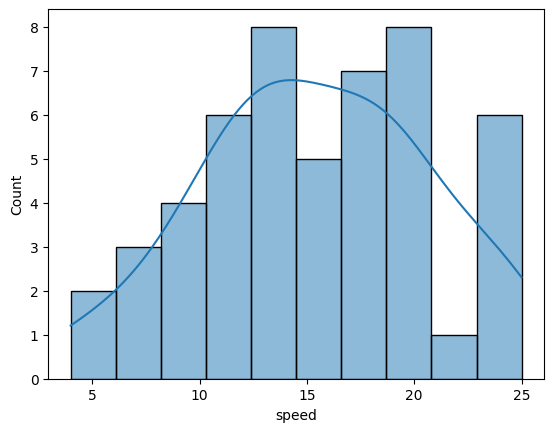

In [20]:
# 데이터 분포 파악
sns.histplot(df_cars['speed'], bins=10, kde=True)

<Axes: xlabel='dist', ylabel='Count'>

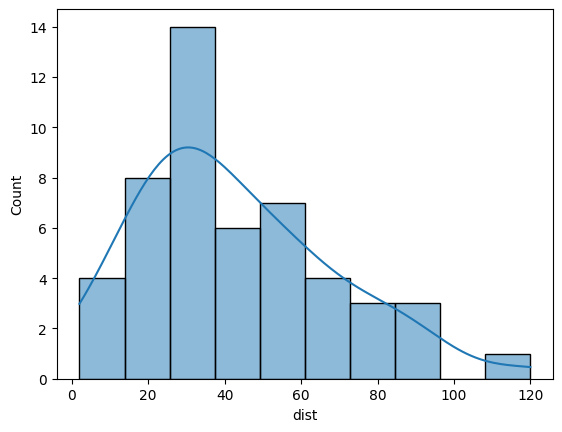

In [21]:
sns.histplot(df_cars['dist'], bins=10, kde=True)

<Axes: xlabel='speed', ylabel='dist'>

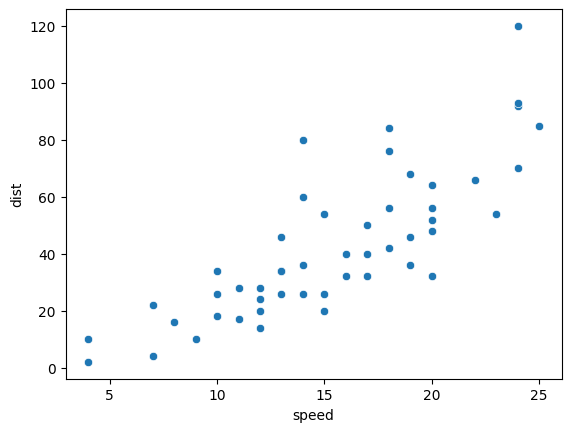

In [22]:
# 변수 간의 관계 파악
sns.scatterplot(x='speed', y='dist', data=df_cars)

<Axes: >

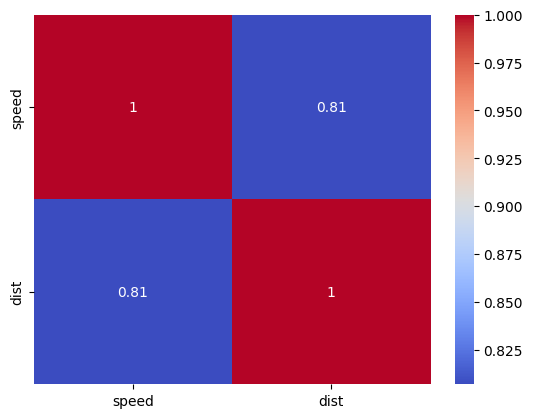

In [23]:
# 상관관계 히트맵

corr = df_cars.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


<Axes: ylabel='speed'>

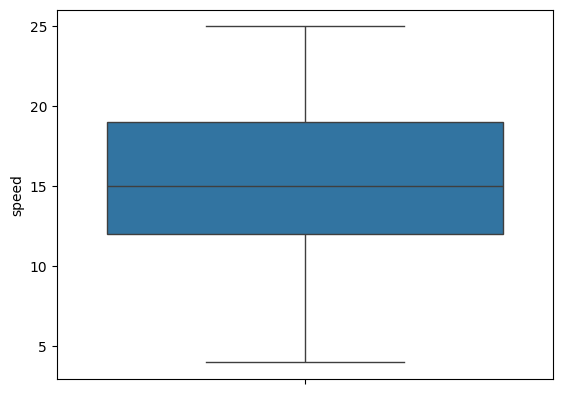

In [24]:
# 이상치 확인

sns.boxplot(df_cars['speed'])

<Axes: ylabel='dist'>

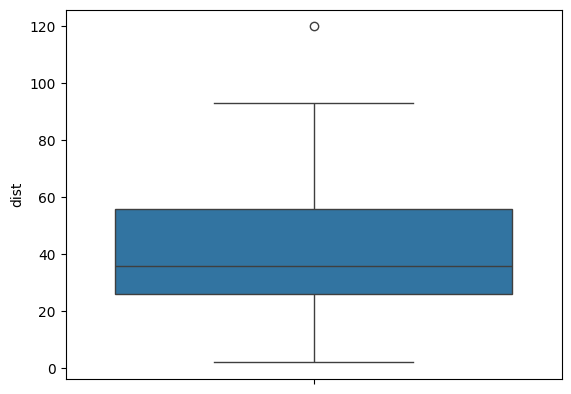

In [25]:
sns.boxplot(df_cars['dist'])

## 이상치 있음 -> 처리 필요

In [26]:
# 이상치 제거
Q1 = df_cars['dist'].quantile(0.25)
Q3 = df_cars['dist'].quantile(0.75)
IQR = Q3 - Q1

# IQR 범위 바깥의 이상치 제거
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_cars[(df_cars['dist'] >= lower_bound) & (df_cars['dist'] <= upper_bound)]


<Axes: xlabel='speed', ylabel='count'>

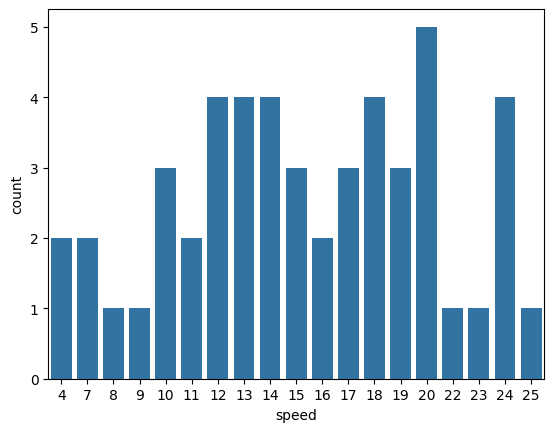

In [27]:
# 빈도수 확인
sns.countplot(x='speed', data=df_cars)

## 모델링(회귀분석)

#### 직접 수행

In [61]:
x = df_no_outliers["speed"]
y = df_no_outliers["dist"]

b1 =  3.639551015260436
b0 =  -14.002144028250719


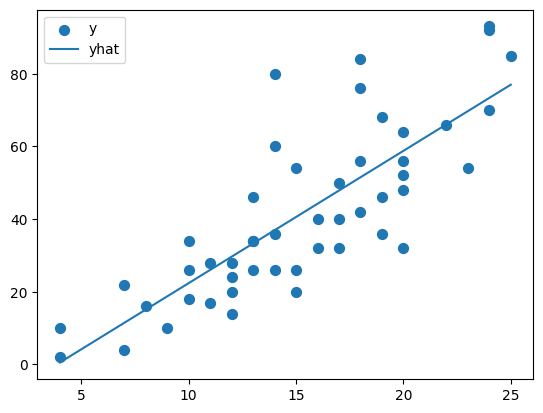

In [73]:
x_mean = np.mean(x)
y_mean = np.mean(y)

Sxy = sum((x - x_mean)*(y - y_mean))
Sxx = sum((x - x_mean)**2)

b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean

print("b1 = ", b1)
print("b0 = ", b0)

# xline = np.linspace(-5, 25, 5)
yhat = b1*x + b0

plt.scatter(x, y, s = 50, label = "y")
plt.plot(x, yhat, label = "yhat")
# plt.xlim(-5, 25)
plt.legend()
plt.show()

### 라이브러리 사용

In [48]:
# 독립변수와 종속변수 설정
X = df_no_outliers[["speed"]]
y = df_no_outliers[["dist"]]

In [49]:
# 데이터셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# 4. 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [43]:
## print
print("coeff = ", model.coef_)
print("intercept = ", model.intercept_)

coeff =  [[3.64658358]]
intercept =  [-13.38972363]


In [36]:
# 5. 예측
y_pred = model.predict(X_test)

In [37]:
# 6. 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)  # R² 점수
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE

print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

R² Score: 0.6939
RMSE: 11.3133


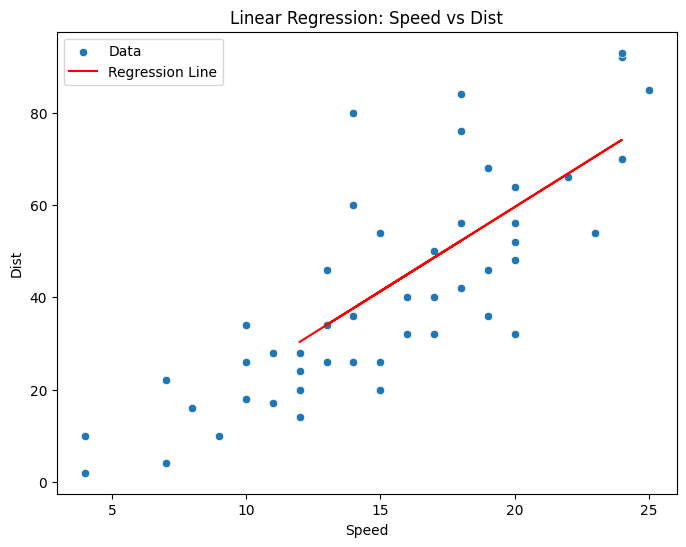

In [38]:
# 7. 회귀선 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='speed', y='dist', data=df_no_outliers, label='Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Speed vs Dist')
plt.xlabel('Speed')
plt.ylabel('Dist')
plt.legend()
plt.show()

# quest 2

In [78]:
## cars dataset
fpath = "../../dataset"
fname = "mtcars.xlsx"
file = os.path.join(fpath, fname)

df_mtcars = pd.read_excel(file)
df_mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [79]:
def summarize_dataframe(df):
    """
    데이터프레임의 다양한 정보를 출력하는 함수.
    
    Parameters:
    df (pd.DataFrame): 요약하려는 데이터프레임
    
    Returns:
    None
    """
    print("====== DataFrame Shape ======")
    print(f"Shape: {df.shape}")  # 데이터프레임의 크기
    
    print("\n====== DataFrame Columns ======")
    print(f"Columns: {df.columns.tolist()}")  # 컬럼 이름 출력
    
    print("\n====== DataFrame Info ======")
    df.info()  # 데이터프레임의 기본 정보
    
    print("\n====== DataFrame Description ======")
    display(df.describe(include='all'))  # 기술 통계
    
    print("\n====== Unique Values per Column ======")
    unique_vals = df.nunique()
    display(unique_vals)  # 각 컬럼의 고유값 수
    
    print("\n====== DataFrame Head (First 5 rows) ======")
    display(df.head())  # 첫 5개 행 출력
    
    print("\n====== DataFrame Missing Values ======")
    missing_values = df.isnull().sum()
    display(missing_values[missing_values > 0])  # 결측치가 있는 열들만 출력
    
    print("\n====== DataFrame Duplicates ======")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")  # 중복된 행의 수 출력


In [80]:
summarize_dataframe(df_mtcars)

====== DataFrame Shape ======
Shape: (32, 12)

====== DataFrame Columns ======
Columns: ['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

====== DataFrame Info ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB

====== DataFrame Description ======


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
unique,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mazda RX4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,NaN,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,NaN,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,NaN,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,NaN,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,NaN,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000



====== Unique Values per Column ======


Unnamed: 0    32
mpg           25
cyl            3
disp          27
hp            22
drat          22
wt            29
qsec          30
vs             2
am             2
gear           3
carb           6
dtype: int64


====== DataFrame Head (First 5 rows) ======


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2



====== DataFrame Missing Values ======


Series([], dtype: int64)


====== DataFrame Duplicates ======
Number of duplicate rows: 0


### Dataset DDA


|Index|Variable|Definition|DataRange|Key|DataType|Comments|
|--|--|--|--|--|--|--|
|01|mpg|Miles Per Gallon|10.4-33.9|-|수치형(연속형)|자동차가 1갤런의 연료로 주행할 수 있는 거리|
|02|cyl|Number of Cylinders|4-8|4, 5, 6, 7, 8|범주형(순서형)|자동차 엔진의 실린더 수|
|03|disp|Displacement|71.1-472.0|-|수치형(연속형)|엔진의 총 배기량|
|04|hp|Horsepower|52-335|-|수치형(연속형)|자동차 엔진의 출력을 나타내는 지표|
|05|drat|Rear Axle Ratio|2.76-4.93|-|수치형(연속형)|자동차의 후륜 차축 비율|
|06|wt|Weight|1.513-5.424|-|수치형(연속형)|자동차의 중량|

In [81]:
print(min(df_mtcars["mpg"].values))
print(max(df_mtcars["mpg"].values))

10.4
33.9


In [82]:
print(min(df_mtcars["cyl"].values))
print(max(df_mtcars["cyl"].values))

4
8


In [83]:
print(min(df_mtcars["disp"].values))
print(max(df_mtcars["disp"].values))

71.1
472.0


In [84]:
print(min(df_mtcars["hp"].values))
print(max(df_mtcars["hp"].values))

52
335


In [85]:
print(min(df_mtcars["drat"].values))
print(max(df_mtcars["drat"].values))

2.76
4.93


In [86]:
print(min(df_mtcars["wt"].values))
print(max(df_mtcars["wt"].values))

1.513
5.424


### EDA

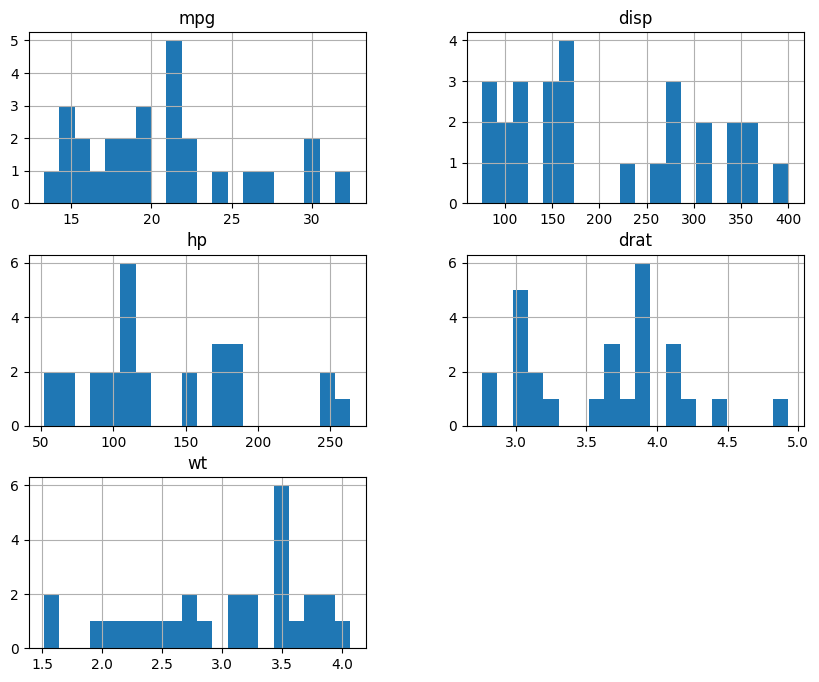

In [102]:
# 히스토그램
df_mtcars[['mpg', 'disp', 'hp', 'drat', 'wt']].hist(bins=20, figsize=(10, 8))
plt.show()

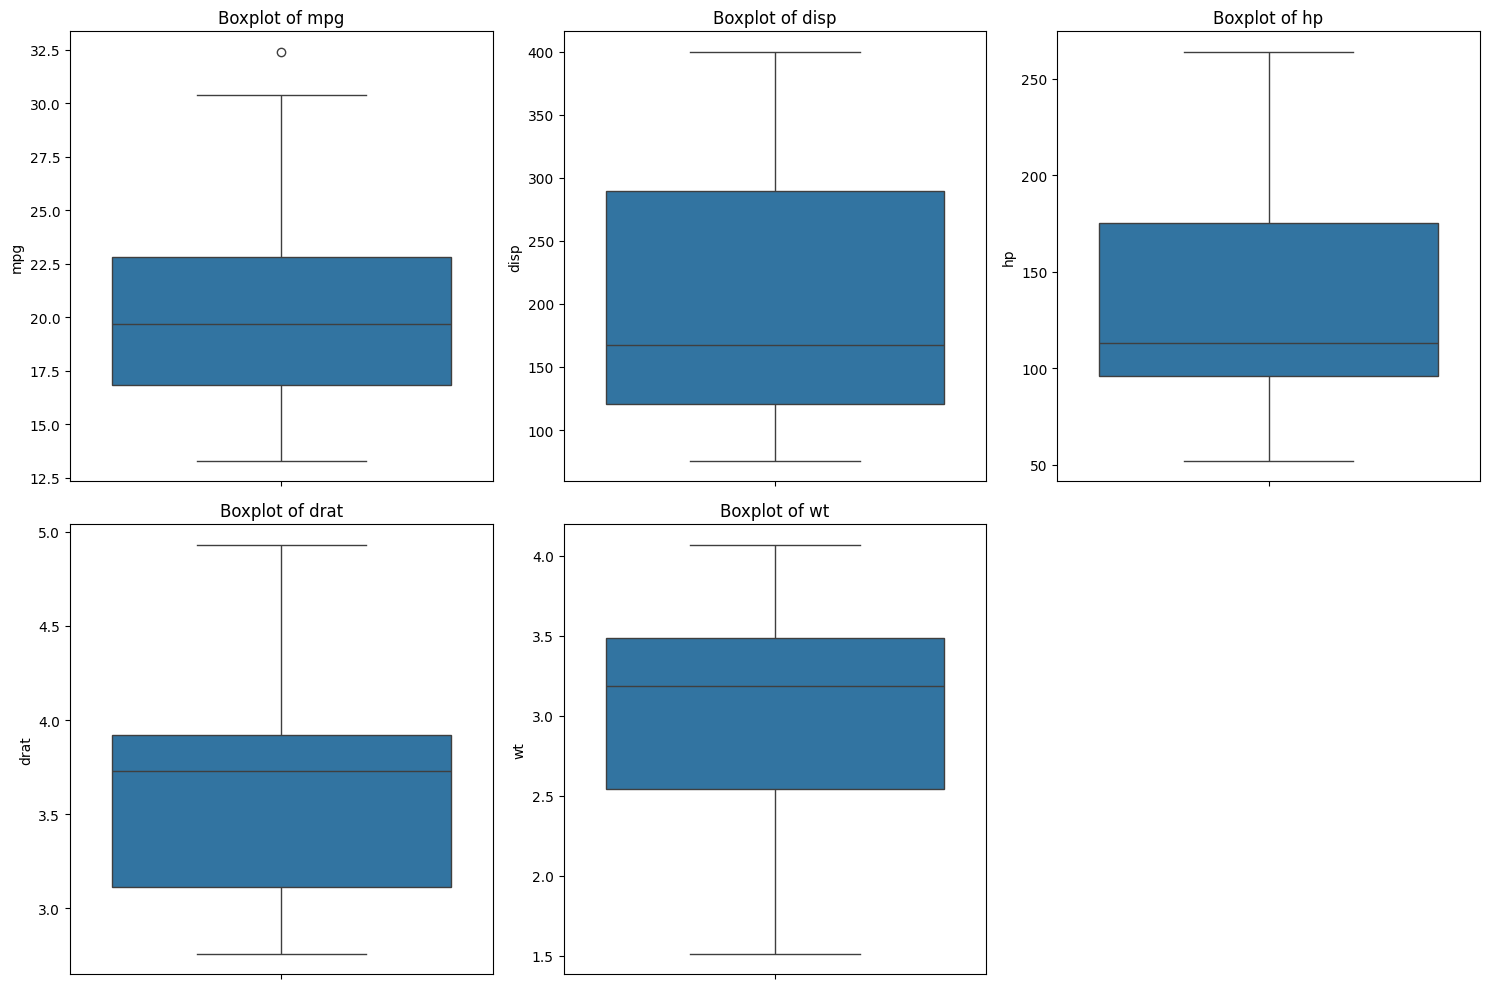

In [103]:
# 이상치 확인
# 각 수치형 변수에 대해 박스플롯을 개별적으로 그리기
columns = ['mpg', 'disp', 'hp', 'drat', 'wt']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # 2x3 그리드에 서브플롯 생성
    sns.boxplot(y=df_mtcars[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [104]:
# 이상치 제거 함수
def remove_outliers_iqr(df, column):
    """
    IQR 기반으로 이상치를 제거하는 함수
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 제거
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [105]:
# 이상치 제거
# 이상치를 제거할 열 목록
columns_to_check = ['mpg', 'disp', 'hp', 'drat', 'wt']

# 이상치 제거
for column in columns_to_check:
    df_mtcars = remove_outliers_iqr(df_mtcars, column)

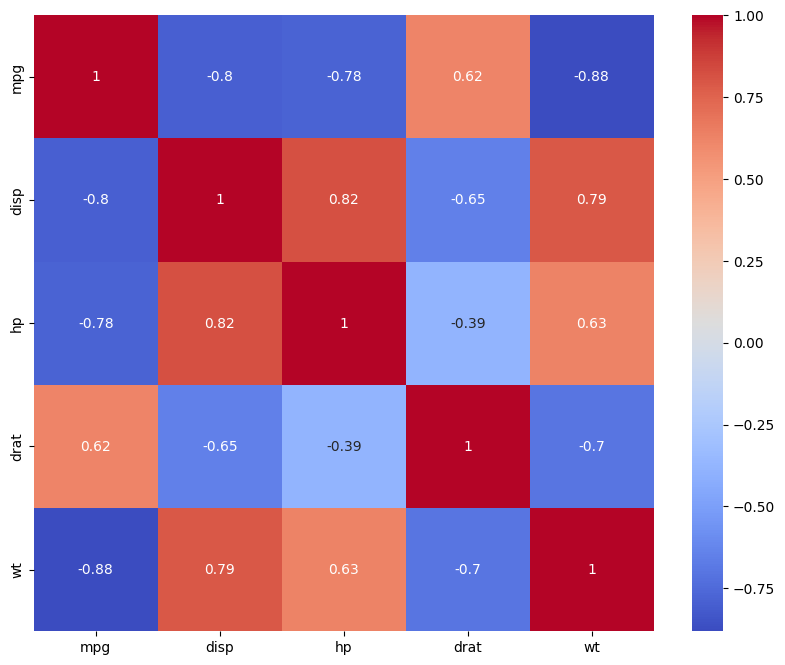

In [107]:
# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df_mtcars[['mpg', 'disp', 'hp', 'drat', 'wt']].corr(), annot=True, cmap='coolwarm')
plt.show()

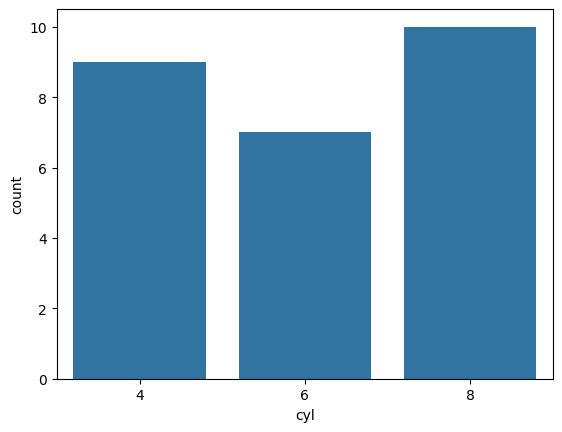

In [108]:
# 범주형 변수 
sns.countplot(x='cyl', data=df_mtcars)
plt.show()

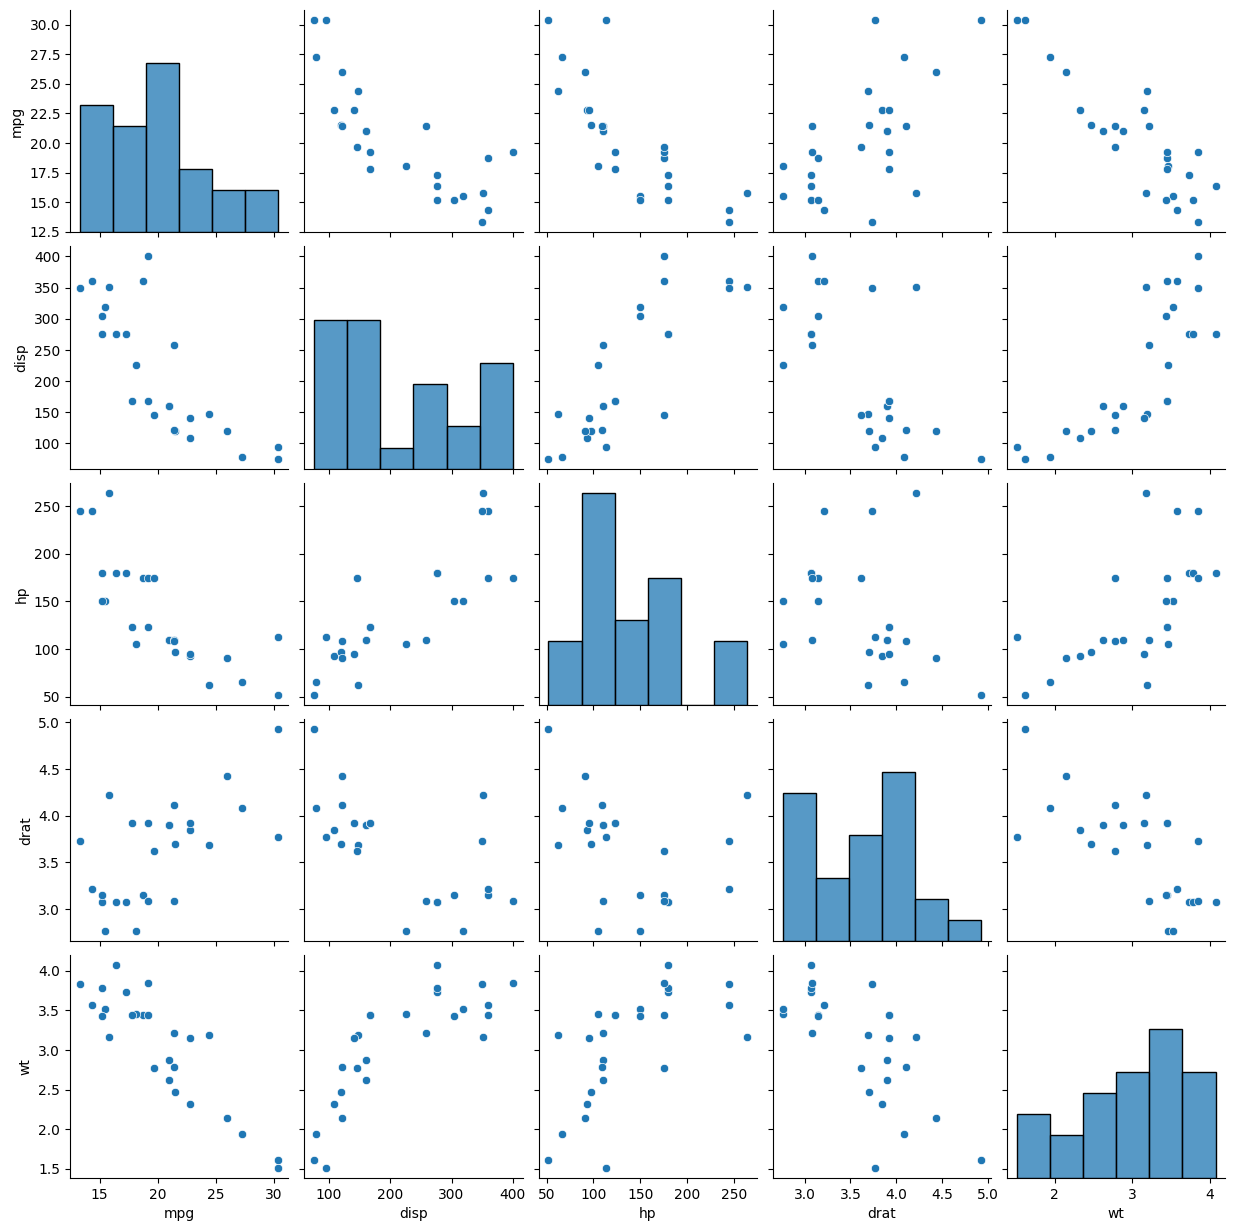

In [109]:
# 변수간 관계 분석
sns.pairplot(df_mtcars[['mpg', 'disp', 'hp', 'drat', 'wt']])
plt.show()

## 모델링

In [110]:
X = df_mtcars[['cyl', 'disp', 'hp', 'drat', 'wt']]
y = df_mtcars['mpg']

In [127]:
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [128]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [129]:
print("coeff = ", model.coef_)
print("intercept = ", model.intercept_)

coeff =  [-0.53519049  0.01726814 -0.04877423  2.277885   -1.73225969]
intercept =  23.499610131008108


In [130]:
y_pred = model.predict(X_test)

In [131]:
r2 = r2_score(y_test, y_pred)  # R² 점수
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

R^2 Score: 0.7157771943932529
Mean Squared Error: 11.088479056071227


In [132]:
model.score(X_test, y_test)

0.7157771943932529

In [133]:
model.score(X_train, y_train)

0.8968000555579401

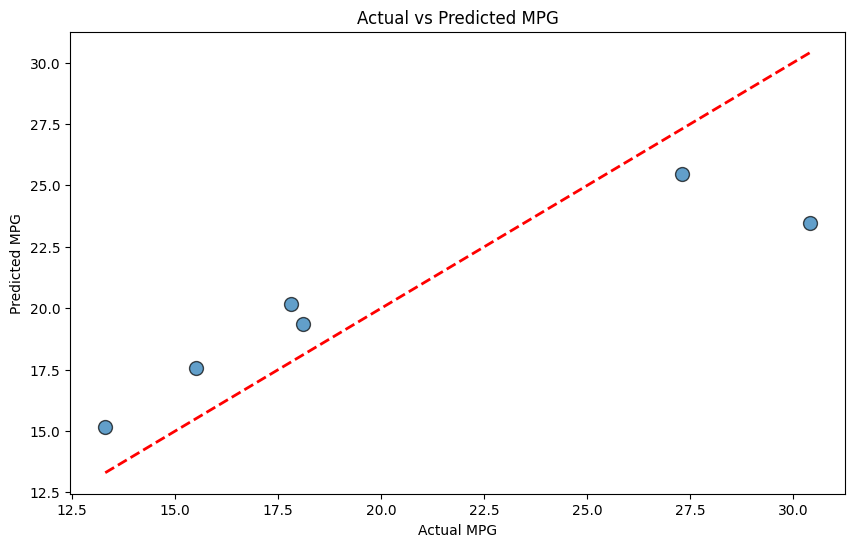

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k", s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()